In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
%matplotlib inline

## Class Lasso:
Lasso (least absolute shrinkage and selection operator; is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 
<br>
Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

\begin{equation*}
L\{X, Y, \theta\} = \frac{1}{2 * m}\Big[\sum_{k=1}^m(Y-X(\theta))^2 +\lambda\|\theta\|_1\Big]
\end{equation*}

where **λ** is regularization parameter.
<br>
- Class is callable and will calculate lasso regularization term on calling.
- It has grad function which will calculate the gradient of lasso regularization term.


## Class Ridge:
Ridge Regression is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model. Often predictor variables used in a regression are highly correlated. When they are, the regression coefficient of any one variable depend on which other predictor variables are included in the model, and which ones are left out. 
<br>
ridge regression performs L2 regularization, i.e. it adds a factor of sum of square of **L2** norm of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

\begin{equation*}
L\{X, Y, \theta\} = \frac{1}{2 * m}\Big[\sum_{k=1}^m(Y-X(\theta))^2 +\lambda\|\theta\|_2^2\Big]
\end{equation*}

where **λ** is regularization parameter.
<br>
- Class is callable and will calculate ridge regularization term on calling.
- It has grad function which will calculate the gradient of ridge regularization term.


In [6]:
class lasso:
    def __init__(self, lambd):
        self.lambd = lambd

    def __call__(self, w):
        return 0.5 * self.lambd * np.linalg.norm(w)

    def grad(self, w):
        return self.lambd * w


class ridge:
    def __init__(self, lambd):
        self.lambd = lambd

    def __call__(self, w):
        return self.lambd * np.sum(np.abs(w))

    def grad(self, w):
        return self.lambd * np.sign(w)

In [12]:
class LinearRegression:
    def __init__(self,
                 alpha=0.01,
                 iterariton=1000,
                 regularization="Ridge",
                 lambd=0):
        self.alpha = alpha
        self.iterariton = iterariton
        self.theta_history = []
        if regularization == "Ridge":
            self.regularization = ridge(lambd)
        else:
            self.regularization = lasso(lambd)

    def cost_function(self, X, y, add = True):
        regularization_param = 0
        if add:
            regularization_param = self.regularization(self.theta)
        return (np.sum(np.power(((X @ self.theta.T) - y), 2)) +
                regularization_param) / (2 * len(X))

    def standardize(self, X):
        X_standardized = (X - self.mean) / self.var
        return X_standardized

    def gradient_Descent(self, train_X, train_y):
        self.cost = np.zeros(self.iterariton)
        m = len(train_X)
        for i in range(self.iterariton):
            grad = np.sum(
                train_X * (train_X @ self.theta.T - train_y),
                axis=0) + self.regularization.grad(self.theta)
            grad = grad * self.alpha / m
            self.theta = self.theta - grad
            self.cost[i] = self.cost_function(train_X, train_y)
            self.theta_history.append(self.theta.flatten())

    def train(self, train_X, train_y):
        self.mean, self.var = train_X.mean(), train_X.std()
        train_X = self.standardize(train_X)
        train_X = train_X.values
        ones = np.ones([train_X.shape[0], 1])
        train_X = np.concatenate((ones, train_X), axis=1)
        train_y = train_y.values
        limit = np.sqrt(1 / train_X.shape[1])
        self.theta = np.random.uniform(-limit, limit, (1, train_X.shape[1]))
        self.gradient_Descent(train_X, train_y)
        return self.cost_function(train_X, train_y, False)

    def predict(self, test_X):
        test_X = self.standardize(test_X)
        test_X = test_X.values
        ones = np.ones([test_X.shape[0], 1])
        test_X = np.concatenate((ones, test_X), axis=1)
        return test_X @ self.theta.T

    def error(self, y_pred, y_true):
        return (np.sum(np.square(y_pred - y_true))) / (2 * len(y_pred))

    def plot_wieghts_vs_iterations(self):
        plt.style.use('fivethirtyeight')
        weights = np.array(self.theta_history).T
        for i, w in enumerate(weights):
            plt.plot([i for i in range(1, self.iterariton + 1)],
                     w,
                     '-',
                     linewidth=1,
                     label="w" + str(i))
        plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
        plt.show()

In [13]:
Admission_data = pd.read_csv('AdmissionDataset/data.csv')
Admission_X = Admission_data.drop(['Serial No.', 'Chance of Admit '], axis=1)
Admission_y = Admission_data[['Chance of Admit ']]
Admission_train_X, Admission_test_X, Admission_train_y, Admission_test_y = train_test_split(
    Admission_X, Admission_y)

# Part 1

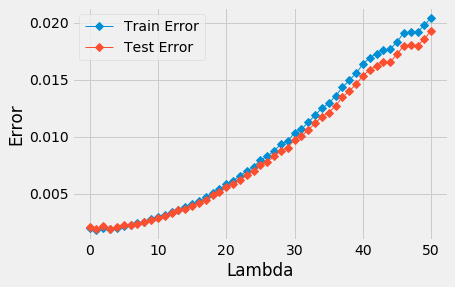

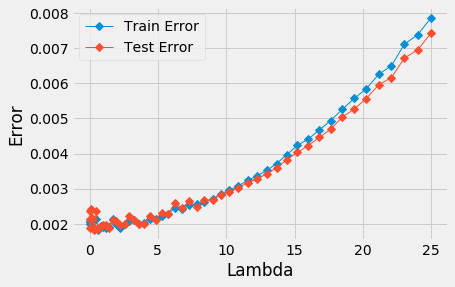

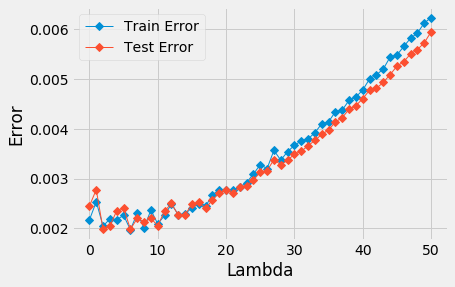

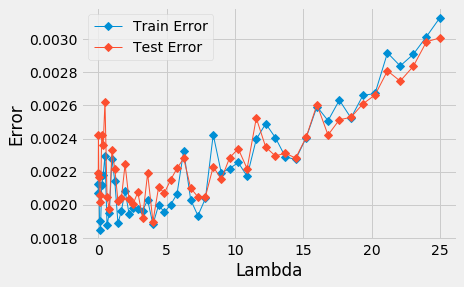

In [14]:
lambdas = [(i**2) * 0.01 for i in range(0, 51)]
def plot(lambdas):
    train_error = []
    test_error = []
    for lambd in lambdas:
        LR = LinearRegression(lambd=lambd)
        train_error.append(LR.train(Admission_train_X, Admission_train_y))
        predicted_y = LR.predict(Admission_test_X)
        test_error.append(LR.error(predicted_y, Admission_test_y.values))
    plt.style.use('fivethirtyeight')
    plt.plot(lambdas, train_error, '-D', linewidth=1, label="Train Error")
    plt.plot(lambdas, test_error, '-D', linewidth=1, label="Test Error")
    plt.legend(loc="best")
    plt.xlabel('Lambda')
    plt.ylabel("Error")
    plt.show()
    
lambdas = [i for i in range(0, 51)]
plot(lambdas)
lambdas = [(i**2) * 0.01 for i in range(0, 51)]
plot(lambdas)

def plot(lambdas):
    train_error = []
    test_error = []
    for lambd in lambdas:
        LR = LinearRegression(regularization="Lasso", lambd=lambd)
        train_error.append(LR.train(Admission_train_X, Admission_train_y))
        predicted_y = LR.predict(Admission_test_X)
        test_error.append(LR.error(predicted_y, Admission_test_y.values))
    plt.xlabel("Lambda")
    plt.ylabel("Error")
    plt.style.use('fivethirtyeight')
    plt.plot(lambdas, train_error, '-D', linewidth=1, label="Train Error")
    plt.plot(lambdas, test_error, '-D', linewidth=1, label="Test Error")
    plt.legend(loc="best")
    plt.show()
    
lambdas = [i for i in range(0, 51)]
plot(lambdas)
lambdas = [(i**2) * 0.01 for i in range(0, 51)]
plot(lambdas)

## Observations:
- The curve is smoothly increasing.
- Training error become higher than test error for larger lambdas
- Both training and testing errors are increasing.
- The curve is smooth also for very small values of lambda

# Part 2

In [20]:
def plot(lambdas):
    train_error = []
    test_error = []
    for lambd in lambdas:
        LR = LinearRegression(regularization="Lasso", lambd=lambd)
        train_error.append(LR.train(Admission_train_X, Admission_train_y))
        predicted_y = LR.predict(Admission_test_X)
        test_error.append(LR.error(predicted_y, Admission_test_y.values))
    plt.xlabel("Lambda")
    plt.ylabel("Error")
    plt.style.use('fivethirtyeight')
    plt.plot(lambdas, train_error, '-D', linewidth=1, label="Train Error")
    plt.plot(lambdas, test_error, '-D', linewidth=1, label="Test Error")
    plt.legend(loc="best")
    plt.show()

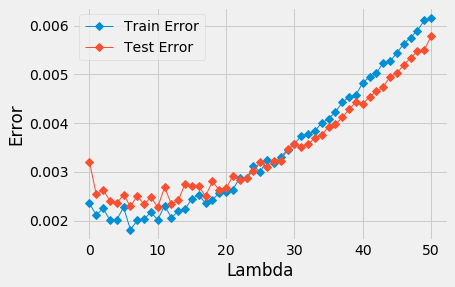

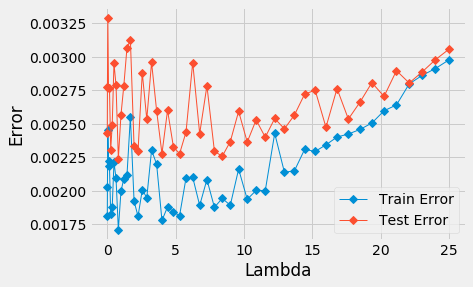

In [21]:
lambdas = [i for i in range(0, 51)]
plot(lambdas)
lambdas = [(i**2) * 0.01 for i in range(0, 51)]
plot(lambdas)

## Observations:
- The curve is increasing.
- For smaller values of Lmabda training error is less than test error.
- For larger values of lambda test error is less than test error.
- The curve is highly unsmooth for smaller value of lambda

## Part 3:
- For small values of lambda test error is much higher than train error.
- As we increase lambda the train error becomes higher than test error.
- However for large mabdas the error (both train and test) are very high.
- Larger lambdas represent low variance thus test error is less.
- Smaller lambdas represent low bias thus train error is less.
- We have to choose lambda such that train and test error are minimized.
- For Ridge regularization that value is around (10-15)
- For Lasso regularization that value is around (20-30)

## Part 4:

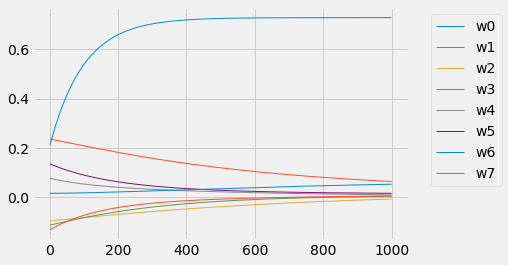

In [22]:
LR = LinearRegression(regularization="Lasso", lambd=1)
train_error = LR.train(Admission_train_X, Admission_train_y)
LR.plot_wieghts_vs_iterations()

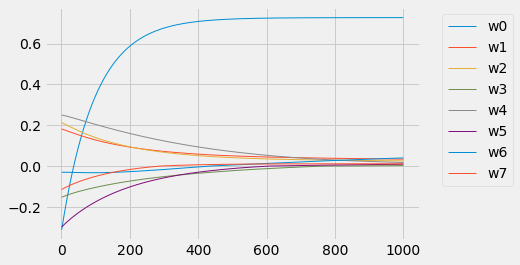

In [23]:
LR = LinearRegression(lambd=1)
train_error = LR.train(Admission_train_X, Admission_train_y)
LR.plot_wieghts_vs_iterations()

## Obserations:
- Most of the weights are becoming zero with increasing iterations.
- The result is mostly because of one parameter that is w0.
- Ridge wieghts are fater converging towards 0.

In [24]:
def K_fold_cross_validation(X,
                            y,
                            alpha=0.01,
                            iterariton=1000,
                            regularization="Ridge",
                            lambd=0,
                            K=10):
    LR = LinearRegression(
        alpha=alpha,
        iterariton=iterariton,
        regularization=regularization,
        lambd=lambd)
    rkf = RepeatedKFold(n_splits=K, n_repeats=K, random_state=None)
    train_error = []
    test_error = []
    for train_index, test_index in rkf.split(X):
        #         display(train_index, test_index)
        train_X, test_X = X.iloc[train_index], X.iloc[test_index]
        train_y, test_y = y.iloc[train_index], y.iloc[test_index]
        train_error.append(LR.train(train_X, train_y))
        predicted_y = LR.predict(test_X)
        test_error.append(LR.error(predicted_y, test_y.values))


#     train_error = np.array(train_error)
#     test_error = np.array(test_error)

    return np.mean(train_error), np.mean(test_error)

In [ ]:
ks = [i for i in range(2, 50)]
train_errors = []
test_errors = []
for k in ks:
    train_error, test_error = K_fold_cross_validation(
        Admission_X, Admission_y, K=k)
    train_errors.append(train_error)
    test_errors.append(test_error)

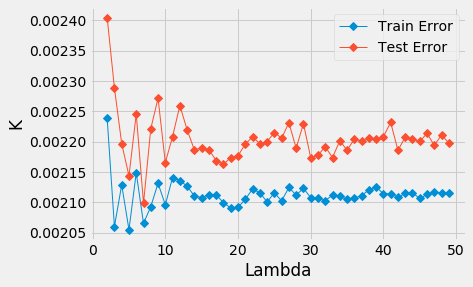

In [46]:
plt.xlabel("Lambda")
plt.ylabel("K")
plt.style.use('fivethirtyeight')
plt.plot(ks, train_errors, '-D', linewidth=1, label="Train Error")
plt.plot(ks, test_errors, '-D', linewidth=1, label="Test Error")
plt.legend(loc="best")
plt.show()

In [25]:
def leave_one_out(X,
                  y,
                  alpha=0.01,
                  iterariton=1000,
                  regularization="Ridge",
                  lambd=0):
    return K_fold_cross_validation(
        X,
        y,
        alpha=0.01,
        iterariton=1000,
        regularization="Ridge",
        lambd=0,
        K=len(X))